In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
data=pd.read_csv(r'train_modified.csv')

In [3]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Not Applicable,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,1,0,0,0,0,0,9.30,0.016047,249.8092,1,2,3735.1380,22,0,0,1,0,0,1,0
1,0,0,0,1,0,0,5.92,0.019278,48.2692,1,0,443.4228,12,0,1,0,1,0,0,0
2,0,0,0,0,0,1,17.50,0.016760,141.6180,1,2,2097.2700,22,0,0,1,0,0,1,0
3,0,0,0,0,1,0,19.20,0.000000,182.0950,0,0,732.3800,23,0,1,0,0,0,1,0
4,0,0,0,1,0,0,8.93,0.000000,53.8614,2,0,994.7052,34,1,0,1,0,0,0,1


In [4]:
X = data.drop('Item_Outlet_Sales', axis = 1)
Y = data['Item_Outlet_Sales']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
#data leakage
X_test_std = sc.transform(X_test)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_std,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = lin_reg.predict(X_test_std)
print(r2_score(Y_test, y_pred))
print(np.sqrt(mean_squared_error(Y_test, y_pred)))

0.5443136960020729
1157.5791986696438


In [28]:
r2_score(Y_test, y_pred)

0.5443136960020729

In [33]:
lm = LinearRegression()
scores = cross_val_score(lm,X_train_std,Y_train, scoring='r2', cv=5)
scores    

array([0.55496292, 0.55810669, 0.56480051, 0.56157901, 0.5788685 ])

In [35]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train_std,Y_train, scoring='r2', cv=folds)
scores  

array([0.57978547, 0.56224284, 0.54043908, 0.56084206, 0.578611  ])

In [43]:
target = 'Item_Outlet_Sales'
predictors = [x for x in data.columns if x not in [target]]

<AxesSubplot:title={'center':'Model Coefficients'}>

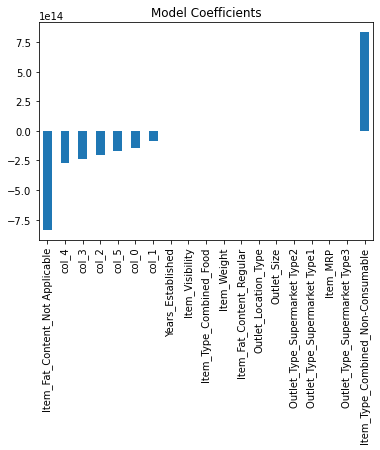

In [45]:
coef1 = pd.Series(lin_reg.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [47]:
from sklearn.tree import DecisionTreeRegressor


clf = DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

In [49]:
y_pred = clf.predict(X_test)
print(r2_score(Y_test, y_pred))
print(np.sqrt(mean_squared_error(Y_test, y_pred)))

0.16490646974357648
1567.058775189477


In [52]:
X_test

,col_0,col_1,col_2,col_3,col_4,col_5,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Years_Established,Item_Fat_Content_Not Applicable,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
947,0,0,1,0,0,0,18.500,0.061955,145.1418,1,0,36,0,1,0,0,1,1,0
5491,0,0,0,1,0,0,15.250,0.060889,130.1968,1,0,36,1,0,0,0,1,0,1
900,0,0,0,0,1,0,9.170,0.000000,144.8470,0,2,36,0,0,0,0,0,1,0
3038,0,0,1,0,0,0,14.500,0.089918,160.3604,1,2,22,1,0,1,0,0,0,1
3621,0,0,0,0,1,0,6.360,0.120544,45.8060,0,2,24,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,0,0,0,1,0,18.100,0.022395,96.5094,0,1,17,0,0,1,0,0,1,0
7802,0,0,0,0,1,0,20.750,0.108931,160.9578,0,1,19,0,0,1,0,0,1,0
7171,0,0,0,0,1,0,17.750,0.067176,187.1240,1,0,36,0,1,0,0,1,1,0
6169,0,0,0,0,0,1,6.155,0.094201,213.3560,1,0,36,0,1,0,0,1,1,0
